In [83]:
import pandas as pd
import numpy as np
import pickle
import configparser
from sqlalchemy import create_engine
from sqlalchemy.types import String, Integer
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

config = configparser.ConfigParser()
config.read('config.ini')
username = config['mariadb']['username']
password = config['mariadb']['password']
database = config['mariadb']['database']
url = 'mysql+pymysql://' + username + ':' + password + '@localhost:3306/' + database + '?charset=utf8'
engine = create_engine(url)

In [84]:
sql = '''
SELECT *
FROM grantaward
LEFT OUTER JOIN kaken_master_category USING (category_niicode)
LEFT OUTER JOIN kaken_master_section USING (section_niicode)
LEFT OUTER JOIN kaken_master_institution USING (institution_niicode)
WHERE grantaward.startfiscalyear >= 2009
AND grantaward.category_niicode = 73
'''
df = pd.read_sql_query(sql, engine)

In [85]:
pivot = pd.crosstab(df['category_name'], df['startfiscalyear'])
pivot

startfiscalyear,2014,2015,2016,2017,2018
category_name,,,,,
新学術領域研究(研究領域提案型),1052,1073,1091,1028,875


Text(0,0.5,'採択件数')

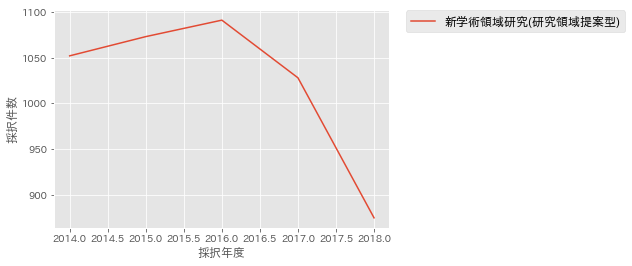

In [86]:
pivot = pivot.T
pivot.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
plt.xlabel("採択年度")
plt.ylabel("採択件数")

In [87]:
pivot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 2014 to 2018
Data columns (total 1 columns):
新学術領域研究(研究領域提案型)    5 non-null int64
dtypes: int64(1)
memory usage: 240.0 bytes


In [88]:
teidaicode = [10101, 11301, 12601, 13901, 14301, 14401, 17102, 15301, 13101, 23903, 22701, 24402]
teidai = df[df['institution_niicode'].isin(teidaicode)]
pivot = pd.crosstab(teidai['institution_name'], teidai['startfiscalyear'])
pivot = pivot.sort_values(2018, ascending=False)
pivot

startfiscalyear,2014,2015,2016,2017,2018
institution_name,,,,,
東京大学,109,113,138,123,120
京都大学,78,93,85,87,63
大阪大学,56,78,64,52,50
東北大学,62,50,63,52,43
九州大学,39,32,43,30,42
北海道大学,36,40,31,32,40
名古屋大学,45,51,58,52,40
新潟大学,4,4,8,10,11
岡山大学,10,9,10,11,10


(0, 144.9)

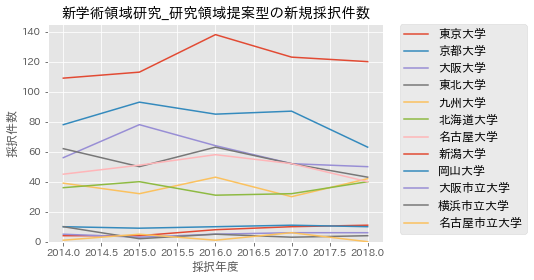

In [89]:
pivot = pd.crosstab(teidai['institution_name'], teidai['startfiscalyear'])
pivot = pivot.sort_values(2018, ascending=False)
pivot = pivot.T
ax = pivot.plot()
ax.set_title('新学術領域研究_研究領域提案型の新規採択件数')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
ax.set_xlabel("採択年度")
ax.set_ylabel("採択件数")
ax.set_ylim(0)

In [90]:
pivot

institution_name,東京大学,京都大学,大阪大学,東北大学,九州大学,北海道大学,名古屋大学,新潟大学,岡山大学,大阪市立大学,横浜市立大学,名古屋市立大学
startfiscalyear,,,,,,,,,,,,
2014,109,78,56,62,39,36,45,4,10,5,10,1
2015,113,93,78,50,32,40,51,4,9,3,2,5
2016,138,85,64,63,43,31,58,8,10,5,5,1
2017,123,87,52,52,30,32,52,10,11,6,3,6
2018,120,63,50,43,42,40,40,11,10,6,4,0


(0, 144.9)

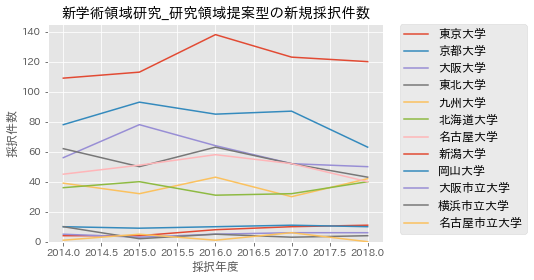

In [91]:
#pivot = pd.crosstab(teidai['institution_name'], teidai['startfiscalyear'])
#pivot = pivot.sort_values(2018, ascending=False)
#pivot = pivot.T
ax = pivot.plot()
ax.set_title('新学術領域研究_研究領域提案型の新規採択件数')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
ax.set_xlabel("採択年度")
ax.set_ylabel("採択件数")
ax.set_ylim(0)